<a href="https://colab.research.google.com/github/immy78/spam_Classification/blob/main/Spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/immy78/spam_Classification/main/spam.tsv.txt',sep='\t')
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
len(data)

5572

In [4]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
data.head(2)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6


In [6]:
ham = data[data['label']=='ham'].sample(747)
ham.head()
print(len(ham))

747


In [7]:
spam = data[data['label']=='spam']
spam.head()
print(len(ham))

747


In [8]:
df = pd.concat([ham,spam],axis =0)
df.head(2)

,label,message,length,punct
2362,ham,Hi. I'm sorry i missed your call. Can you pls ...,56,4
1268,ham,SERIOUSLY. TELL HER THOSE EXACT WORDS RIGHT NOW.,48,2


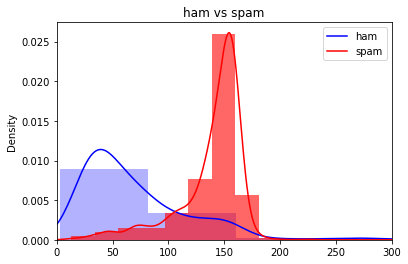

In [9]:
ax = df[df['label']=='ham']['length'].hist(density = True,color = 'blue',alpha =.3)
df[df['label']=='ham']['length'].plot(kind ='density',color = 'blue')

ax = df[df['label']=='spam']['length'].hist(density = True,color = 'red',alpha =.6)
df[df['label']=='spam']['length'].plot(kind ='density',color = 'red')

ax.legend(['ham','spam'])
plt.title('ham vs spam')

plt.xlim(0,300)

plt.show()


## Data Prepration

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
x_train,x_test,y_train,y_test = train_test_split(df['message'],df['label'],test_size =0.3,random_state = 0,shuffle =True)

In [12]:
x_train.shape , x_test.shape

((1045,), (449,))

In [13]:
y_train.shape , y_test.shape

((1045,), (449,))

In [14]:
#vectorizer = TfidfVectorizer()

In [15]:
#x_train = vectorizer.fit_transform(x_train)
#x_train.shape


In [16]:
model = Pipeline([('tfidf',TfidfVectorizer()), ('r_forest',RandomForestClassifier(n_estimators=100 , n_jobs=-1))])

In [17]:
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [18]:
# Training Accuracy
model.score(x_train,y_train)   # My Training model is overfitted

1.0

In [19]:
y_pred = model.predict(x_test)    # So this model first convert x_test to vectorizer then apply random forest to it

In [20]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 21, 201]])

In [21]:
#(221+197)/(221+197+27+4)

In [22]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [23]:
model.predict(['Hi! This is imran here. How are you'])

array(['ham'], dtype=object)

In [24]:
model.predict(["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"])

array(['spam'], dtype=object)

### Piplinig with SVM

In [36]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('svm' ,SVC(C=100,gamma='auto'))])

In [37]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svm',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [38]:
y_pred_svm = clf.predict(x_test)

In [39]:
confusion_matrix(y_test,y_pred_svm)

array([[225,   2],
       [ 18, 204]])

In [40]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [41]:
clf.predict(['Hi! This is imran here. How are you'])

array(['ham'], dtype=object)

In [43]:
clf.predict(['You have free WON ticket to America. Coupan code is XXX3454'])

array(['spam'], dtype=object)